In [159]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd
from sklearn.metrics import mean_absolute_error

# zf = zipfile.ZipFile('train.csv') # having First.csv zipped file.
# df = pd.read_csv(zf.open('First.csv'))
# zf.namelist()

In [271]:
df = pd.read_csv('trials.csv')
df.head()

,seg_id,s_1.399,mom_thresh1,high_perf_mad,high_perf_2>all,mom_no_mad>all,high_perf_2>350,hihg_perf,mom_no_mad>450,mom_no_mad>350,...,"x_boost_q.01,q1","x_boost_q.01,q2_chunk100k","cat_boost_q.01,q2_chunk100k",cat_boost_X^2_iter150k,cat_boost_stress,"cat_boost_gmean,moment","cat_boost_cov,mad,^2","XG_boost_cov,mad,^2",mom_with_mad,mom_test
0,seg_00030f,2.758496,4.813072,4.803791,5.085042,4.881901,5.082076,5.072974,4.845364,4.767634,...,6.171664,6.630610,6.372284,6.021126,6.765503,4.488160,5.950476,5.021116,5.524893,0.911145
1,seg_0012b5,4.727802,5.151473,4.953674,5.248349,5.084020,5.121334,5.364486,5.118548,5.256577,...,4.254911,4.491638,6.741349,3.557144,6.127743,3.494064,7.603061,5.890548,5.378945,1.706676
2,seg_00184e,4.800617,4.201016,4.363938,4.148363,4.236012,4.106418,4.354455,4.155296,4.310045,...,4.891191,5.171248,6.116491,2.849080,5.901290,4.260162,4.326413,5.495267,5.190347,1.423223
3,seg_003339,8.430898,7.989161,8.237808,8.036720,7.954241,8.024865,7.904128,7.878657,7.898501,...,8.341473,8.038451,9.032653,10.029639,8.838232,9.893470,7.945621,8.516683,8.027126,1.294841
4,seg_0042cc,6.839888,6.175409,6.274891,6.344967,6.078181,6.352232,6.527306,6.300756,6.333973,...,5.656432,6.072399,7.732861,4.535049,7.215291,5.663322,6.044042,6.018748,6.385911,1.956026


In [272]:
df.reset_index()
df=df

In [267]:
df = df.sample(frac=0.009, replace=True, random_state=823)
a = "#000080"
b = "#00BFFF"
c = "#32cd32"
d = "#FF4510"


In [273]:
bench = df['s_1.399']
trial1 = df['high_perf_2>350']
trial2 = df['s_1.4']
trial3 = df['high_perf_mad']

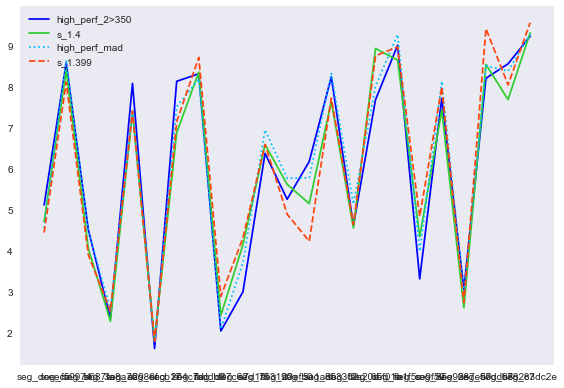

In [264]:
# bench = df['s_1.399']
# trial1 = df['high_perf_2>350']
# trial2 = df['s_1.4']
# trial3 = df['high_perf_mad']
# trial4=df['x_boost_q.01,q2_chunk100k']
seg=df['seg_id']
fig, ax1 = plt.subplots()
# figsize=(5, 5)
# ax2 = ax1.twinx()
ax1.plot(seg, trial1, color='blue')
ax1.plot(seg, trial2, color=c)
ax1.plot(seg, trial3, color=b, linestyle=":")
# ax1.plot(seg, trial4, color=a)
ax1.plot(seg, bench, linestyle="--", color=d)

# plt.title("Unemployment Rate vs Affordability Tiers",fontdict = {'fontsize' : 20})

# ax1.set_xlabel("Year",fontdict = {'fontsize' : 14})
# ax1.set_ylabel("Affordibility Percentage",fontdict = {'fontsize' : 14})
# ax2.set_ylabel("Unemployment Rate",fontdict = {'fontsize' : 14})

# ax1.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
# ax2.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

# ax1.tick_params(direction='out', length=5, axis="x", labelsize=12)
# ax1.tick_params(axis="y", labelsize=12)
# ax2.tick_params(axis="y", labelsize=12)

plt.grid()
handles, labels = ax1.get_legend_handles_labels()
handles1, labels1 = ax2.get_legend_handles_labels()
legend = plt.legend(handles + handles1, labels + labels1, loc="upper left")
plt.tight_layout()

plt.style.use("seaborn")

plt.savefig('chart.png', dpi=300)
plt.show()

In [274]:
mean_absolute_error(bench, df['high_perf_2>350'])

0.6689189586775915

In [275]:
mean_absolute_error(bench, df['high_perf_mad'])

0.6120860681993141

In [276]:
mean_absolute_error(bench, df['mom_no_mad>all'])

0.6643814991310976

In [278]:
mean_absolute_error(df['s_1.399'], df['mom_thresh1'])

KeyError: 'mom_thresh2'

In [254]:
df1=df.drop(columns='seg_id')
df1.head()

,s_1.399,high_perf_mad,high_perf_2>all,mom_no_mad>all,high_perf_2>350,hihg_perf,mom_no_mad>450,mom_no_mad>350,s_1.627,s_1.661,...,"x_boost_q.01,q1","x_boost_q.01,q2_chunk100k","cat_boost_q.01,q2_chunk100k",cat_boost_X^2_iter150k,cat_boost_stress,"cat_boost_gmean,moment","cat_boost_cov,mad,^2","XG_boost_cov,mad,^2",mom_with_mad,mom_test
0,2.758496,4.803791,5.085042,4.881901,5.082076,5.072974,4.845364,4.767634,5.264082,5.524893,...,6.171664,6.630610,6.372284,6.021126,6.765503,4.488160,5.950476,5.021116,5.524893,0.911145
1,4.727802,4.953674,5.248349,5.084020,5.121334,5.364486,5.118548,5.256577,5.931597,5.378945,...,4.254911,4.491638,6.741349,3.557144,6.127743,3.494064,7.603061,5.890548,5.378945,1.706676
2,4.800617,4.363938,4.148363,4.236012,4.106418,4.354455,4.155296,4.310045,5.084643,5.190347,...,4.891191,5.171248,6.116491,2.849080,5.901290,4.260162,4.326413,5.495267,5.190347,1.423223
3,8.430898,8.237808,8.036720,7.954241,8.024865,7.904128,7.878657,7.898501,7.751080,8.027126,...,8.341473,8.038451,9.032653,10.029639,8.838232,9.893470,7.945621,8.516683,8.027126,1.294841
4,6.839888,6.274891,6.344967,6.078181,6.352232,6.527306,6.300756,6.333973,6.400410,6.385911,...,5.656432,6.072399,7.732861,4.535049,7.215291,5.663322,6.044042,6.018748,6.385911,1.956026


In [255]:
name=df1.columns
mae=[]
for col in df1:
    mae.append(mean_absolute_error(bench, df1[col]))
    name.append(df1[col].index)

In [256]:
df2=pd.DataFrame({'name': name, 'mae': mae})

In [257]:
df2.sort_values(by=['mae'])

,name,mae
0,s_1.399,0.000000
11,s_1.4,0.501922
1,high_perf_mad,0.612086
6,mom_no_mad>450,0.660302
7,mom_no_mad>350,0.662225
10,mom_no_mad,0.662225
5,hihg_perf,0.662973
3,mom_no_mad>all,0.664381
2,high_perf_2>all,0.668543
4,high_perf_2>350,0.668919


In [91]:
mae

[0.0,
 0.30059675033333316,
 0.46956609975,
 0.53435208825,
 0.5571704914583334,
 0.5903644459583334,
 0.6021755439166668,
 0.6351550945000001,
 0.6729255380416667,
 0.6836383076666666,
 0.6924411962083332,
 0.7026954635,
 0.712876118,
 0.7130812227916666,
 0.7595576182916665,
 0.8149914575833334,
 0.8216916207916665,
 0.8581610736249999,
 0.9263280322499999,
 0.9413205329583332,
 1.0202864739583333,
 1.0445337319999999,
 1.0562183725416665,
 1.1289000792083332,
 1.1388414657499997,
 1.27214451875,
 1.3295801354583334,
 1.3324624522916666,
 1.3325329861666664,
 1.356092396875,
 1.37015967125,
 1.4790026027499998,
 1.514932282625,
 2.865072383625,
 3.0472285282500002,
 3.9272381716249996,
 5.255146343541666]